In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [36]:
path = r'../data/raw/HousingData.csv'
print(" Loading dataset...")

df = pd.read_csv(path)

print(" Dataset loaded successfully!")
print("Initial data shape:", df.shape)
print("\n Preview of data:")
print(df.head())

 Loading dataset...
 Dataset loaded successfully!
Initial data shape: (506, 14)

 Preview of data:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


In [ ]:
"""
CRIM – tasa de criminalidad

ZN – proporción de zonas residenciales (>25k sq ft)

INDUS – proporción de acres industriales

NOX – concentración de óxidos de nitrógeno

RM – número promedio de habitaciones

AGE – % de casas antiguas

DIS – distancia a centros de empleo

TAX – impuesto predial

PTRATIO – ratio alumno/profesor

B – proporción racial (sí, es polémica, pero es numérica)

LSTAT – % población de bajos ingresos

CHAS - Indica si el tracto colinda con el río Charles. Valores: 0 / 1 / NA

RAD - Índice de accesibilidad a autopistas radiales. Son enteros discretos (1,2,3,4,5...)

MEDV (variable objetivo) - Median value of owner-occupied homes. Es el precio de la vivienda (en miles de USD en el dataset original)
"""

In [15]:
print("\n Data types and null value check:")
print(df.info())

print("\n Any missing values?")
print(df.isnull().sum())

print("\n Any duplicated data?")
print(df.duplicated().sum())


 Data types and null value check:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None

 Any missing values?
CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT

In [16]:
print("\n Basic summary stats for numeric columns:")
print(df.describe())


 Basic summary stats for numeric columns:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.720192   23.388876    6.835896    0.255340    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.081900    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.253715    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.560263   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  486.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.518519    3.795043    9.549407  408.237154   18.455534

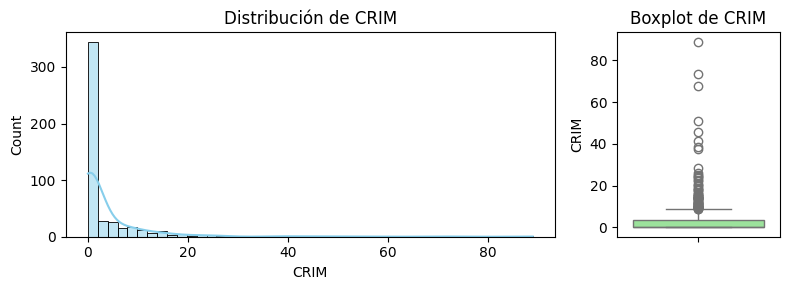

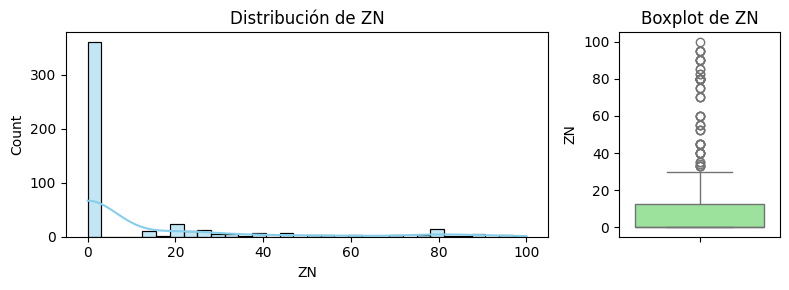

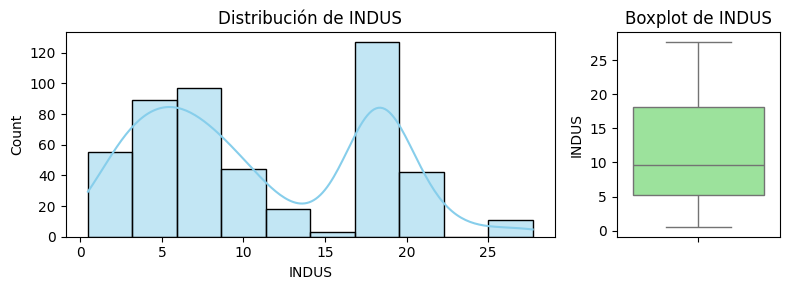

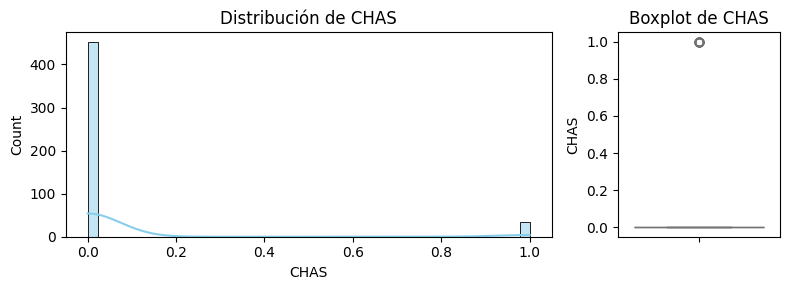

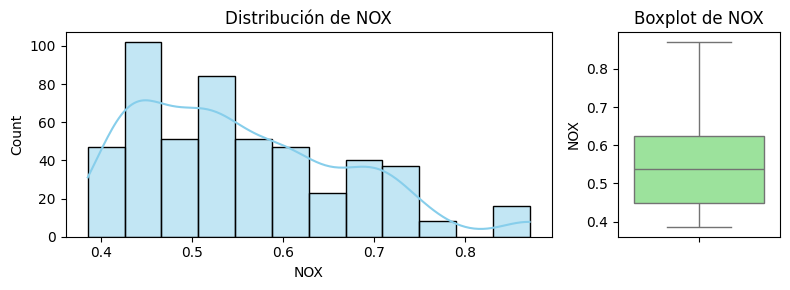

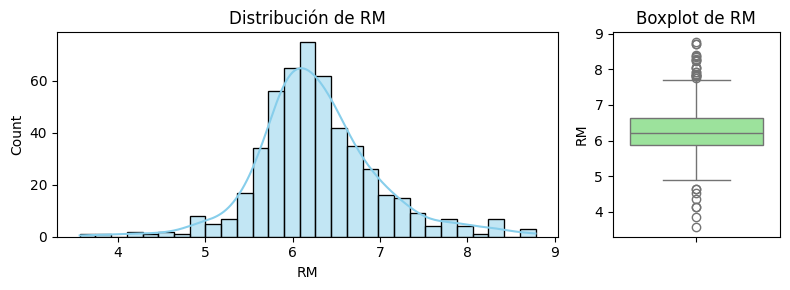

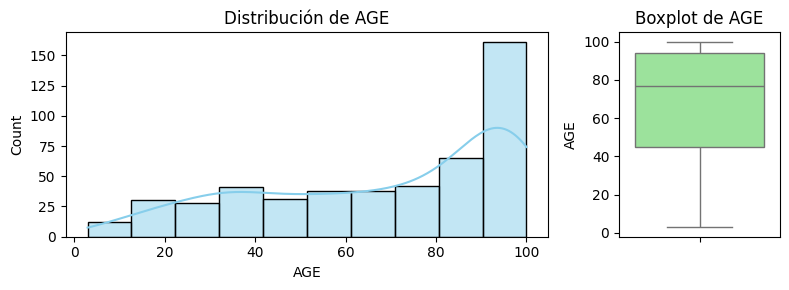

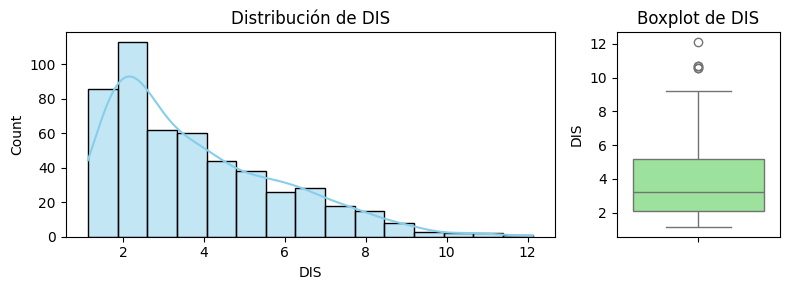

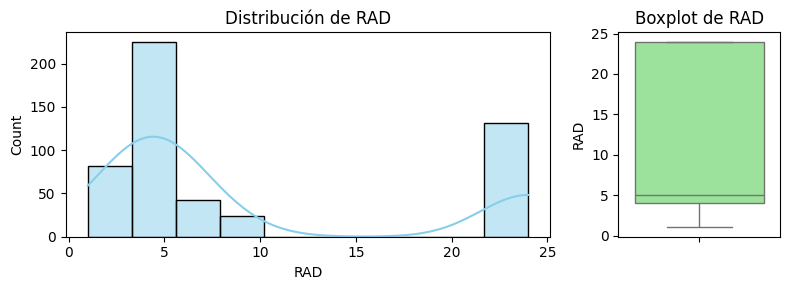

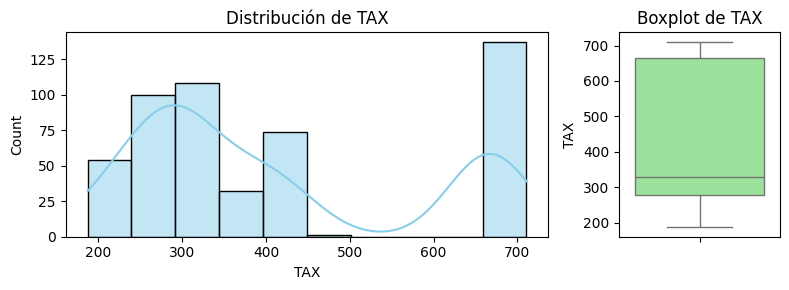

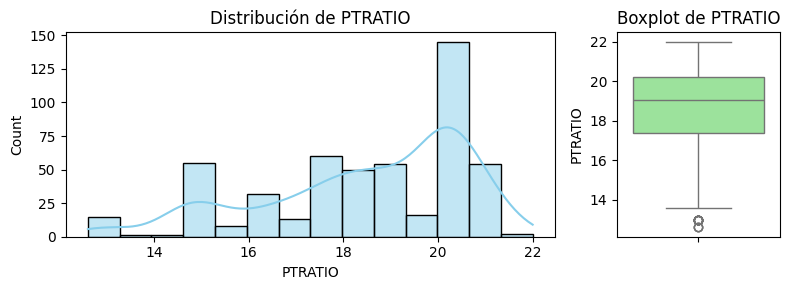

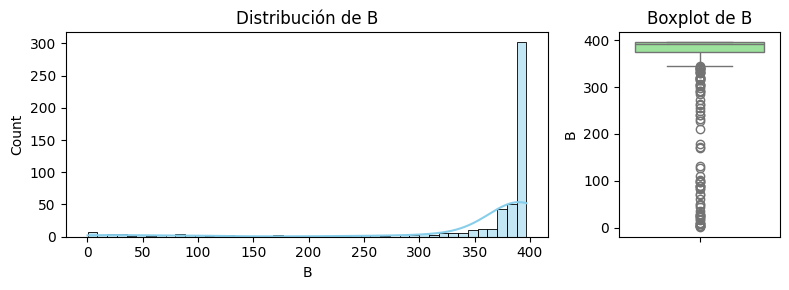

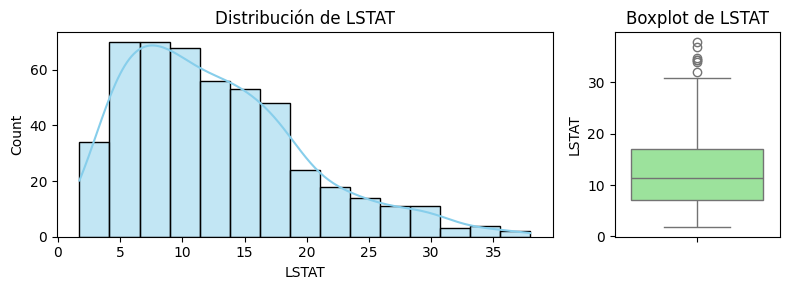

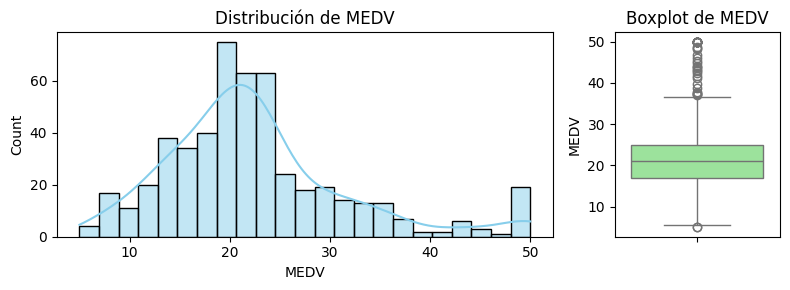

In [31]:
def graficar_distribuciones_con_boxplot(df, columnas):
    """
    Genera histogramas para variables numéricas y gráficos de barras para categóricas,
    y al lado agrega un boxplot (numéricas) o gráfico de barras horizontal (categóricas).
    """
    for col in columnas:
        # División en dos partes para los gráficos
        fig, axes = plt.subplots(1, 2, figsize=(8, 3), gridspec_kw={'width_ratios': [3, 1]})

        if pd.api.types.is_numeric_dtype(df[col]):
            # Histograma con KDE
            sns.histplot(df[col], kde=True, color="skyblue", ax=axes[0])
            axes[0].set_title(f"Distribución de {col}")

            # Boxplot
            sns.boxplot(y=df[col], color="lightgreen", ax=axes[1])
            axes[1].set_title(f"Boxplot de {col}")

        else:
            # Gráfico de barras
            sns.countplot(x=df[col], palette="viridis", ax=axes[0])
            axes[0].set_title(f"Frecuencia de {col}")
            axes[0].tick_params(axis='x', rotation=45)

            # Barras horizontales (como alternativa al boxplot en categóricas)
            df[col].value_counts().plot.barh(ax=axes[1], color="lightgreen")
            axes[1].set_title(f"Frecuencia de {col}")

        plt.tight_layout()
        plt.show()


graficar_distribuciones_con_boxplot(df, df.columns)

In [35]:
Q1 = df['MEDV'].quantile(0.25)
Q3 = df['MEDV'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_upper = df[df['MEDV'] > upper_bound]
df_lower = df[df['MEDV'] < lower_bound]
print("\n Cantidad de registros por encima del rango interquantil:")
print(df_upper.shape[0])
print("\n Porcentaje de registros por encima del rango interquantil:")
print(df_upper.shape[0]/len(df) * 100)

print("\n Cantidad de registros por debajo del rango interquantil:")
print(df_lower.shape[0])
print("\n Porcentaje de registros por debajo del rango interquantil:")
print(df_lower.shape[0]/len(df) * 100)



 Cantidad de registros por encima del rango interquantil:
38

 Porcentaje de registros por encima del rango interquantil:
7.5098814229249005

 Cantidad de registros por debajo del rango interquantil:
2

 Porcentaje de registros por debajo del rango interquantil:
0.3952569169960474


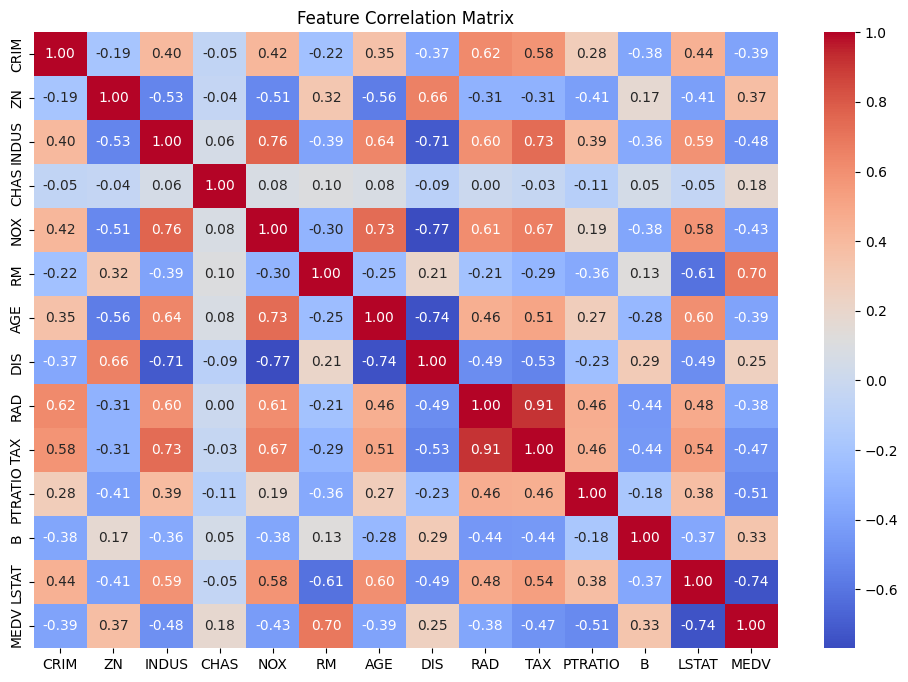

 Displayed feature correlation heatmap.


In [27]:
# Checking how features are correlated with each other
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

print(" Displayed feature correlation heatmap.")

In [ ]:
#
plt.figure(figsize=(10, 6))
sns.countplot(x='location', data=df)
plt.title('Houses by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

print(" Visualized distribution of houses by location.")
